# Aula 2 - Aprendizagem Não Supervisionada
### Base de dados: Github do Curso e no link (https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART)

### Exemplo
- Link: https://github.com/datawaybr/CDKS-0003-FUNDAMENTOS-DE-MACHINE-LEARNING-NAO-SUPERVISIONADO-KICKSTART (referência: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset/data)
  
- Descrição: Uma coleção de características que caracterizam telefones celulares, incluindo potência da bateria, especificações da câmera, suporte de rede, memória, dimensões da tela e outros atributos. A coluna 'faixa_de_preço' categoriza os telefones em faixas de preço, tornando este conjunto de dados adequado para tarefas de classificação de telefones celulares e previsão de preço.

- Problema de Negócio: Sua empresa precisa de um sistema inteligente que defina qual será a faixa de preço para uma lista de novos produtos que serão lançados ao longo do ano.
  
- Objetivo: Imagine que você foi responsável por identificar se há realmente 4 grupos de produtos para serem especificados de modo diferente entre si.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# link do git
df = pd.read_csv("bases/phone/dataset1.csv")
# df.drop(columns=['faixa_de_preço'], axis=1, inplace=True)
df

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,...,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi,faixa_de_preço
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.columns

Index(['potência_da_bateria', 'bluetooth', 'velocidade_do_processador',
       'dual_sim', 'megapixels_câmera_frontal', '4G', 'memória_interna',
       'profundidade_móvel', 'peso_do_dispositivo', 'núcleos_do_processador',
       'megapixels_câmera_principal', 'altura_do_pixel', 'largura_do_pixel',
       'RAM', 'altura_da_tela', 'largura_da_tela', 'tempo_de_conversação',
       '3G', 'tela_touch', 'wi-fi', 'faixa_de_preço'],
      dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='RAM', ylabel='potência_da_bateria'>

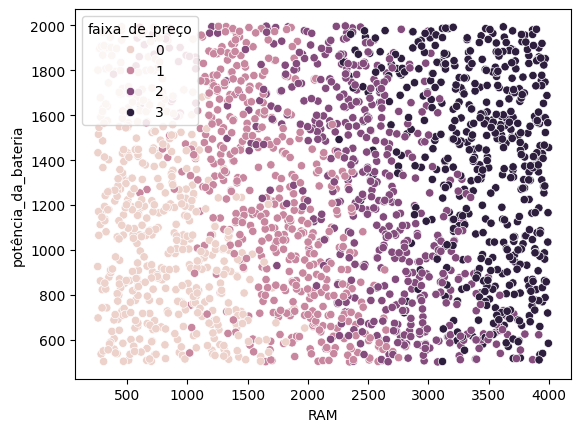

In [5]:
sns.scatterplot(data = df, x = 'RAM', y = 'potência_da_bateria', hue = 'faixa_de_preço')

<Axes: xlabel='RAM', ylabel='largura_do_pixel'>

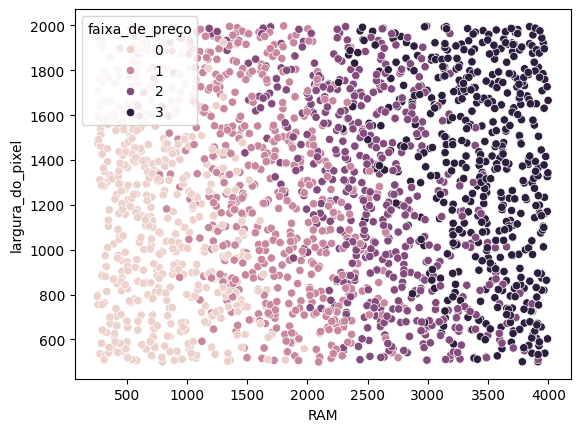

In [6]:
sns.scatterplot(data = df, x = 'RAM', y = 'largura_do_pixel', hue = 'faixa_de_preço')

<Axes: xlabel='largura_do_pixel', ylabel='RAM'>

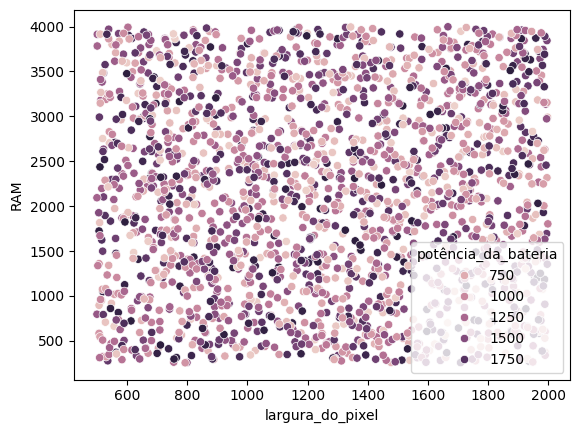

In [7]:
sns.scatterplot(data = df, x = 'largura_do_pixel', y = 'RAM', hue = 'potência_da_bateria')

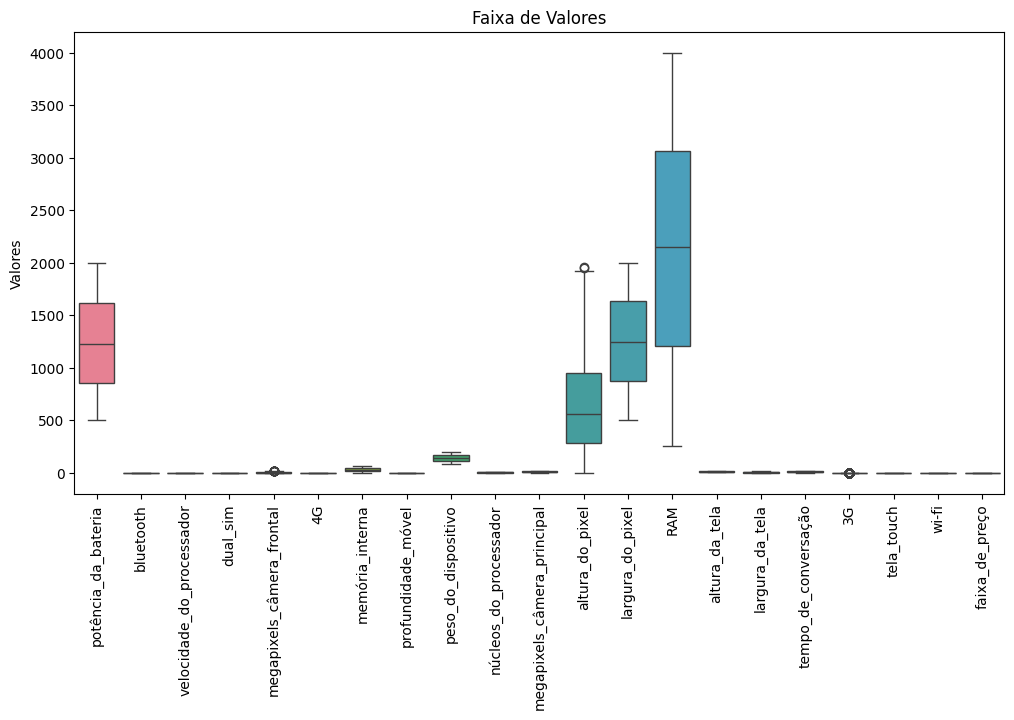

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.ylabel("Valores")
plt.title("Faixa de Valores")
plt.xticks(rotation=90)
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   potência_da_bateria          2000 non-null   int64  
 1   bluetooth                    2000 non-null   int64  
 2   velocidade_do_processador    2000 non-null   float64
 3   dual_sim                     2000 non-null   int64  
 4   megapixels_câmera_frontal    2000 non-null   int64  
 5   4G                           2000 non-null   int64  
 6   memória_interna              2000 non-null   int64  
 7   profundidade_móvel           2000 non-null   float64
 8   peso_do_dispositivo          2000 non-null   int64  
 9   núcleos_do_processador       2000 non-null   int64  
 10  megapixels_câmera_principal  2000 non-null   int64  
 11  altura_do_pixel              2000 non-null   int64  
 12  largura_do_pixel             2000 non-null   int64  
 13  RAM               

----
## Preprocessando os dados

In [10]:
X = df.drop(columns=['faixa_de_preço'], axis=1)
y = df['faixa_de_preço']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [13]:
type(X_train_norm)

numpy.ndarray

In [14]:
X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_norm

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,megapixels_câmera_principal,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi
0,0.619474,0.000000,0.000161,0.000322,0.002255,0.000000,0.014818,0.000161,0.061529,0.000322,0.003221,0.247081,0.566643,0.479665,0.003221,0.002899,0.000966,0.000322,0.000322,0.000322
1,0.262881,0.000478,0.000239,0.000000,0.007647,0.000478,0.010993,0.000048,0.069305,0.000956,0.008125,0.232291,0.922472,0.144345,0.008603,0.002390,0.003824,0.000478,0.000000,0.000000
2,0.535238,0.000000,0.001345,0.000000,0.001922,0.000480,0.004324,0.000192,0.094652,0.001441,0.007207,0.499684,0.514578,0.435782,0.004805,0.003363,0.008168,0.000480,0.000480,0.000000
3,0.328749,0.000450,0.000225,0.000450,0.000000,0.000450,0.012592,0.000225,0.058464,0.003598,0.000000,0.190684,0.464117,0.797813,0.005397,0.003598,0.004497,0.000450,0.000000,0.000000
4,0.676980,0.000000,0.000603,0.000000,0.000000,0.000431,0.008188,0.000043,0.043092,0.002586,0.000431,0.307248,0.602430,0.286995,0.005171,0.004309,0.005602,0.000431,0.000431,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.390129,0.000220,0.000507,0.000000,0.000000,0.000000,0.001984,0.000132,0.040335,0.001322,0.001102,0.242013,0.302626,0.834260,0.002865,0.002204,0.003086,0.000220,0.000000,0.000220
1336,0.853290,0.000496,0.000993,0.000000,0.000000,0.000000,0.005957,0.000149,0.060559,0.003971,0.003475,0.119133,0.448734,0.229331,0.002978,0.001489,0.002482,0.000000,0.000000,0.000000
1337,0.256902,0.000000,0.000256,0.000320,0.000000,0.000000,0.005759,0.000096,0.033912,0.001280,0.000320,0.200595,0.299132,0.896118,0.005759,0.004799,0.003839,0.000000,0.000320,0.000000
1338,0.786297,0.000000,0.000972,0.000000,0.002315,0.000463,0.008335,0.000417,0.074092,0.002778,0.009261,0.168095,0.460294,0.368606,0.006020,0.001389,0.006483,0.000463,0.000000,0.000463


-----
## PCA

In [15]:
X_train_norm.columns

Index(['potência_da_bateria', 'bluetooth', 'velocidade_do_processador',
       'dual_sim', 'megapixels_câmera_frontal', '4G', 'memória_interna',
       'profundidade_móvel', 'peso_do_dispositivo', 'núcleos_do_processador',
       'megapixels_câmera_principal', 'altura_do_pixel', 'largura_do_pixel',
       'RAM', 'altura_da_tela', 'largura_da_tela', 'tempo_de_conversação',
       '3G', 'tela_touch', 'wi-fi'],
      dtype='object')

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(X_train_norm)

print(dfx_pca.explained_variance_ratio_)

[6.42317961e-01 2.36709221e-01 1.00482700e-01 1.73597686e-02
 2.56401563e-03 4.11245199e-04 5.71303006e-05 3.73912401e-05
 3.21239665e-05 1.05249347e-05 9.33177644e-06 6.08764719e-06
 7.88432242e-07 4.16722816e-07 2.96290200e-07 2.86094461e-07
 2.76253863e-07 2.51408698e-07 9.43448347e-08 8.90211763e-08]


In [17]:
limite_importancia = 0.005
n_components = sum(dfx_pca.explained_variance_ratio_ > limite_importancia)
n_components

4

In [18]:
pca = PCA(n_components=n_components)
X_train_norm = pca.fit_transform(X_train_norm)

In [19]:
X_train_norm

array([[ 0.28546762,  0.0676478 ,  0.03615602, -0.05202684],
       [ 0.54559362, -0.34369314,  0.3266382 ,  0.1606103 ],
       [ 0.33476346, -0.08956225, -0.17989862, -0.01463595],
       ...,
       [-0.30415637, -0.07204916, -0.04793315,  0.01971639],
       [ 0.37143204,  0.28320308,  0.01774994,  0.00814802],
       [ 0.49191418,  0.35648789,  0.14792392,  0.08722432]])

----
# Definir o melhor

In [20]:
#!pip install yellowbrick

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings 
warnings.filterwarnings('ignore')

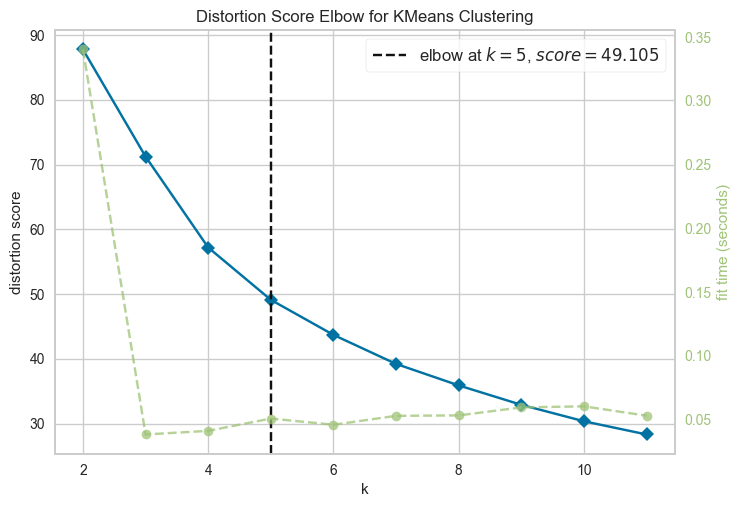

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X_train_norm)        
visualizer.show()

-------
## Implementação KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=5, n_init="auto", random_state=42)
kmeans.fit(X_train_norm)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [25]:
kmeans.cluster_centers_

array([[-2.85456552e-01,  4.99700859e-02,  8.57436583e-03,
         2.25210563e-02],
       [ 6.00044325e-02,  9.28953638e-02, -3.19486412e-04,
        -4.63017437e-02],
       [ 3.82576825e-01,  2.33549092e-01,  1.19316520e-02,
         2.41894996e-02],
       [ 4.05050894e-01, -1.69253269e-01, -4.41625521e-03,
         2.33389655e-02],
       [-9.61078719e-02, -1.56065266e-01, -1.51486794e-02,
        -2.12950378e-02]])

----

In [26]:
## Verificando os valores dos centroides sem normalização

original_norms = np.linalg.norm(
    X_train[['potência_da_bateria', 'bluetooth', 'velocidade_do_processador', 'dual_sim']], 
    axis=0)

In [27]:
cluster_centers_ = (kmeans.cluster_centers_) * original_norms.reshape(1, -1)
cluster_centers_

array([[-1.37737037e+04,  1.27595070e+00,  5.43320562e-01,
         5.91579753e-01],
       [ 2.89530322e+03,  2.37201722e+00, -2.02444752e-02,
        -1.21624731e+00],
       [ 1.84599015e+04,  5.96351039e+00,  7.56057301e-01,
         6.35406173e-01],
       [ 1.95443088e+04, -4.32176216e+00, -2.79839036e-01,
         6.13064469e-01],
       [-4.63734792e+03, -3.98501585e+00, -9.59906441e-01,
        -5.59374880e-01]])

---
## Avaliação

In [28]:
from yellowbrick.cluster import InterclusterDistance

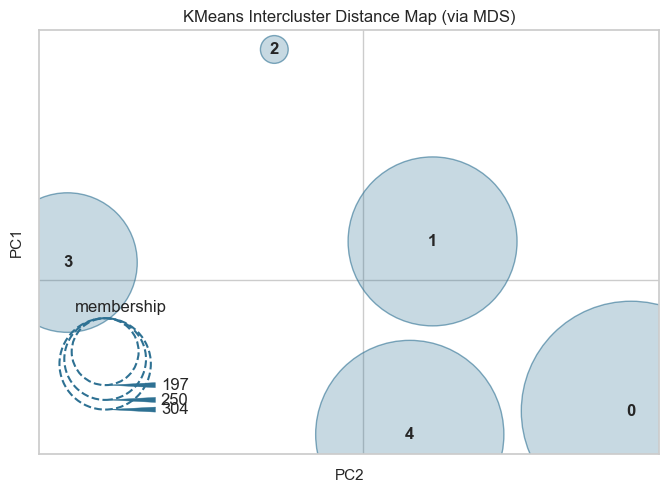

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [29]:
visualizer = InterclusterDistance(kmeans)

visualizer.fit(X_train_norm)
visualizer.show() 

In [30]:
from yellowbrick.cluster import SilhouetteVisualizer

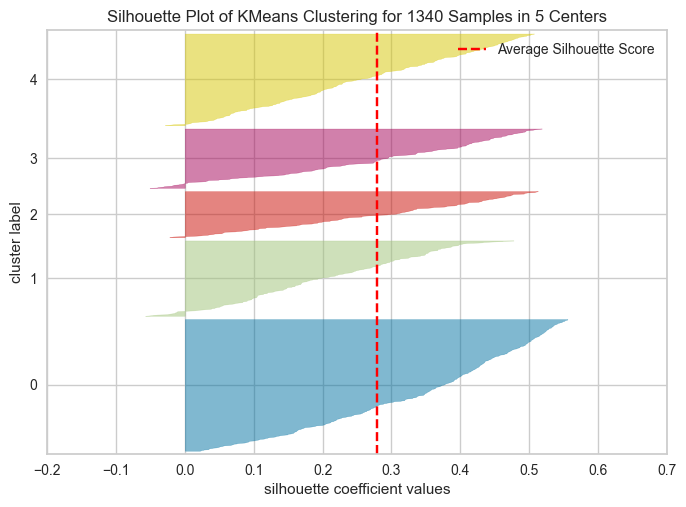

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(X_train_norm) 
visualizer.show()  

For k=2, Silhouette Score: 0.4317
For k=3, Silhouette Score: 0.3917
For k=4, Silhouette Score: 0.2999
For k=5, Silhouette Score: 0.2738
For k=6, Silhouette Score: 0.2812
For k=7, Silhouette Score: 0.2739
For k=8, Silhouette Score: 0.2719
For k=9, Silhouette Score: 0.2737


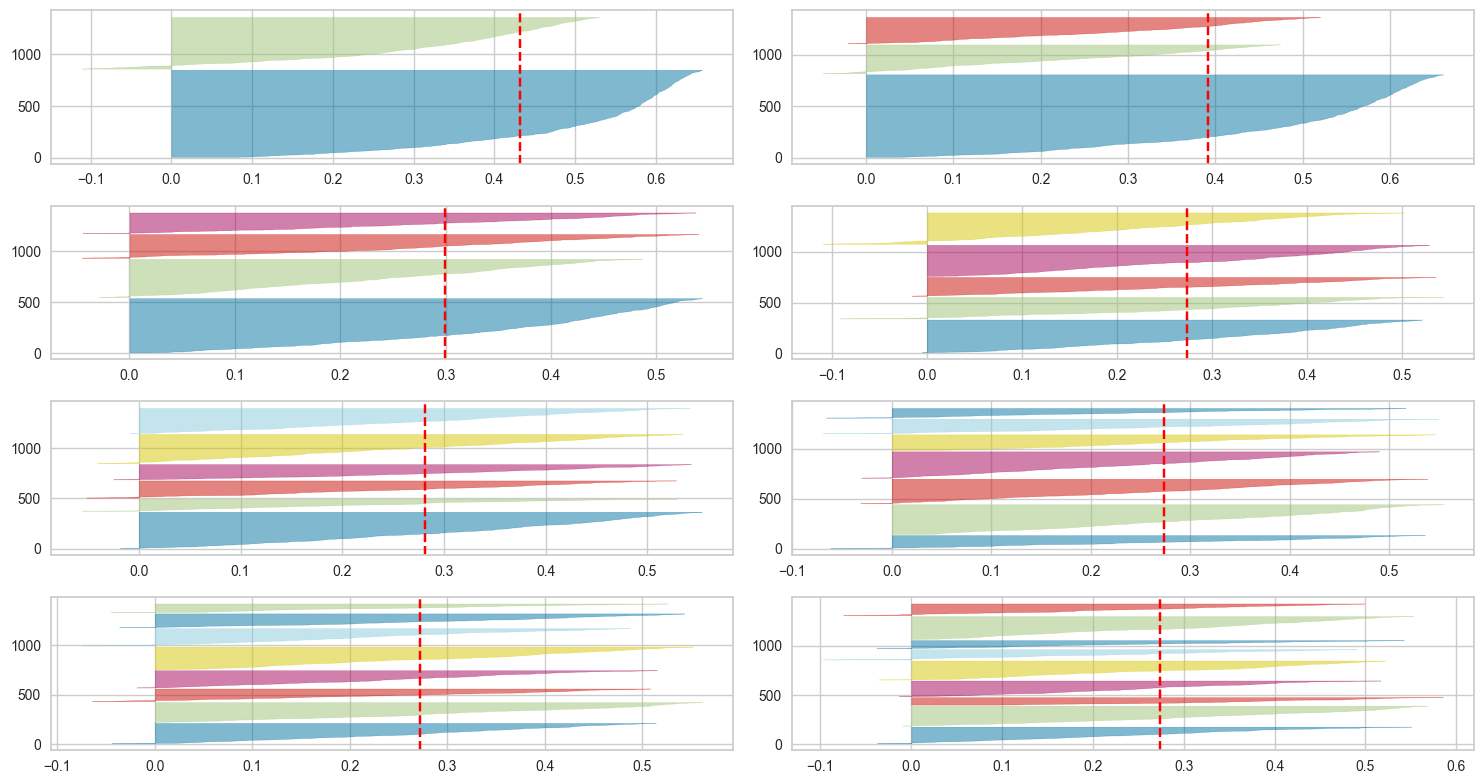

In [32]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

selected_variables = X.columns
k_values = range(2, 10)  
fig, ax = plt.subplots(math.floor(max(k_values) / 2), 2, figsize=(15, 8))

for i, k in enumerate(k_values, 1):
    kmeans_ = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(kmeans_, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train_norm)  # Fit the model and visualize the silhouette scores
    
    silhouette_score = visualizer.silhouette_score_
    print(f'For k={k}, Silhouette Score: {silhouette_score:.4f}')

plt.tight_layout()
plt.show()

-----
## Novos dados

In [33]:
X_test_norm

array([[4.80438635e-01, 2.41790959e-04, 1.20895479e-04, ...,
        2.41790959e-04, 2.41790959e-04, 2.41790959e-04],
       [4.49159316e-01, 4.14736210e-04, 8.29472420e-04, ...,
        0.00000000e+00, 0.00000000e+00, 4.14736210e-04],
       [4.83503907e-01, 0.00000000e+00, 7.03869070e-04, ...,
        2.70718873e-04, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.69994755e-01, 0.00000000e+00, 8.90787029e-04, ...,
        0.00000000e+00, 0.00000000e+00, 3.18138224e-04],
       [4.44290392e-01, 3.01827712e-04, 6.94203737e-04, ...,
        3.01827712e-04, 0.00000000e+00, 0.00000000e+00],
       [1.84806423e-01, 0.00000000e+00, 3.85013381e-04, ...,
        0.00000000e+00, 3.20844484e-04, 3.20844484e-04]])

In [34]:
X_test_norm = pca.transform(X_test_norm)

kmeans.predict(X_test_norm)

array([1, 1, 0, 1, 3, 2, 4, 2, 2, 4, 3, 1, 4, 0, 1, 1, 0, 3, 3, 4, 0, 4,
       4, 0, 3, 1, 4, 4, 2, 4, 0, 4, 0, 3, 0, 3, 1, 4, 1, 1, 0, 0, 2, 1,
       0, 4, 4, 1, 1, 0, 1, 1, 1, 4, 0, 4, 4, 1, 0, 3, 1, 0, 4, 0, 4, 2,
       1, 2, 1, 0, 3, 4, 0, 1, 3, 1, 3, 3, 0, 4, 1, 1, 0, 0, 4, 0, 4, 3,
       4, 4, 3, 0, 3, 1, 4, 0, 0, 4, 2, 4, 1, 0, 4, 0, 4, 3, 0, 3, 3, 2,
       3, 0, 1, 2, 4, 3, 3, 1, 3, 2, 1, 0, 2, 0, 3, 0, 4, 3, 2, 4, 0, 0,
       0, 1, 0, 1, 1, 1, 3, 4, 0, 1, 1, 2, 4, 4, 1, 4, 1, 4, 3, 2, 3, 1,
       0, 0, 0, 4, 3, 0, 2, 4, 4, 4, 2, 1, 0, 2, 0, 2, 4, 2, 4, 0, 2, 2,
       3, 4, 4, 4, 0, 0, 0, 4, 0, 2, 4, 0, 0, 4, 3, 3, 4, 0, 0, 2, 4, 1,
       2, 3, 0, 0, 0, 3, 1, 0, 1, 1, 4, 4, 0, 1, 1, 4, 4, 4, 0, 0, 4, 1,
       0, 3, 0, 1, 0, 0, 3, 4, 1, 4, 4, 4, 2, 3, 0, 0, 3, 3, 0, 2, 3, 0,
       0, 4, 1, 0, 3, 0, 2, 2, 2, 2, 0, 4, 0, 2, 4, 4, 0, 3, 1, 0, 3, 4,
       3, 0, 2, 3, 0, 3, 3, 0, 0, 1, 4, 0, 0, 4, 4, 3, 3, 3, 2, 4, 3, 1,
       0, 4, 0, 3, 1, 4, 0, 4, 3, 4, 3, 0, 4, 1, 0,

In [35]:
# Dados fornecidos
dados = {
    'potência_da_bateria': [574.0],
    'bluetooth': [0.0],
    'velocidade_do_processador': [2.8],
    'dual_sim': [1.0],
    'megapixels_câmera_frontal': [16.0],
    '4G': [0.0],
    'memória_interna': [38.0],
    'profundidade_móvel': [0.1],
    'peso_do_dispositivo': [90.0],
    'núcleos_do_processador': [6.0],
    'megapixels_câmera_principal': [17.0],
    'altura_do_pixel': [286.0],
    'largura_do_pixel': [1171.0],
    'RAM': [3269.0],
    'altura_da_tela': [8.0],
    'largura_da_tela': [7.0],
    'tempo_de_conversação': [10.0],
    '3G': [0.0],
    'tela_touch': [1.0],
    'wi-fi': [0.0]
}

novo_dado = pd.DataFrame(dados)

In [36]:
novo_dado_norm = preprocessing.normalize(novo_dado, axis=1, norm='l2', copy=True, return_norm=False)
novo_dado_norm = pca.transform(novo_dado_norm)
novo_dado_norm

array([[-0.38404319, -0.10144207,  0.07923702,  0.06124747]])

In [37]:
kmeans.predict(novo_dado_norm)

array([0], dtype=int32)

-------
## tsne

In [38]:
X_train_norm

array([[ 0.28546762,  0.0676478 ,  0.03615602, -0.05202684],
       [ 0.54559362, -0.34369314,  0.3266382 ,  0.1606103 ],
       [ 0.33476346, -0.08956225, -0.17989862, -0.01463595],
       ...,
       [-0.30415637, -0.07204916, -0.04793315,  0.01971639],
       [ 0.37143204,  0.28320308,  0.01774994,  0.00814802],
       [ 0.49191418,  0.35648789,  0.14792392,  0.08722432]])

In [41]:
X_train_norm = pd.DataFrame(X_train_norm, columns=['potência_da_bateria', 'bluetooth', 'velocidade_do_processador', 'dual_sim'])
X_train_norm

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim
0,0.285468,0.067648,0.036156,-0.052027
1,0.545594,-0.343693,0.326638,0.160610
2,0.334763,-0.089562,-0.179899,-0.014636
3,-0.133129,-0.086170,0.050074,-0.038481
4,0.487283,0.071796,0.009624,0.007774
...,...,...,...,...
1335,-0.190516,0.008181,-0.096228,-0.020866
1336,0.486254,0.366634,0.046721,0.080377
1337,-0.304156,-0.072049,-0.047933,0.019716
1338,0.371432,0.283203,0.017750,0.008148


In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train_norm)

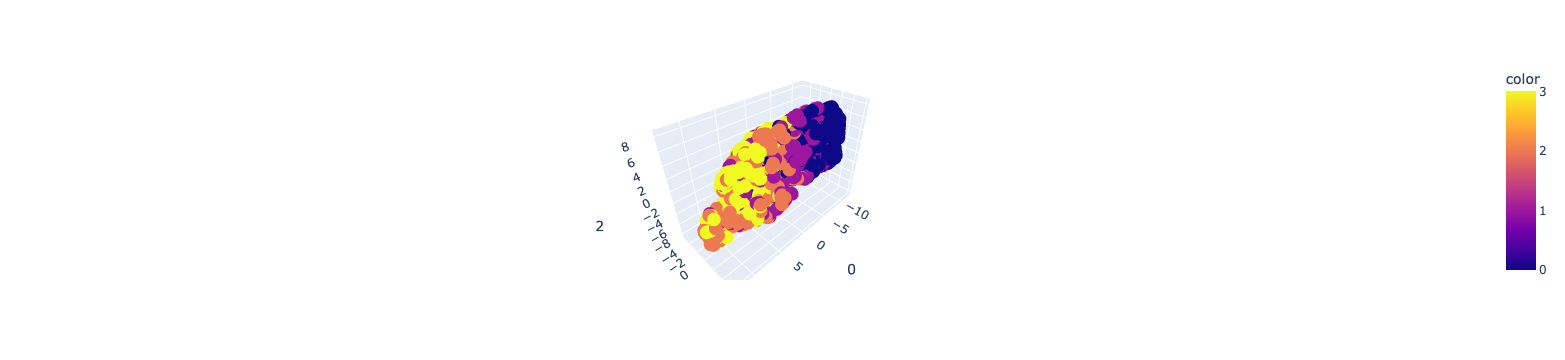

In [45]:
import plotly.express as px

fig = px.scatter_3d(X_tsne, x=0, y=1, z=2, color=y_train)
fig.show()

In [46]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_train_norm)

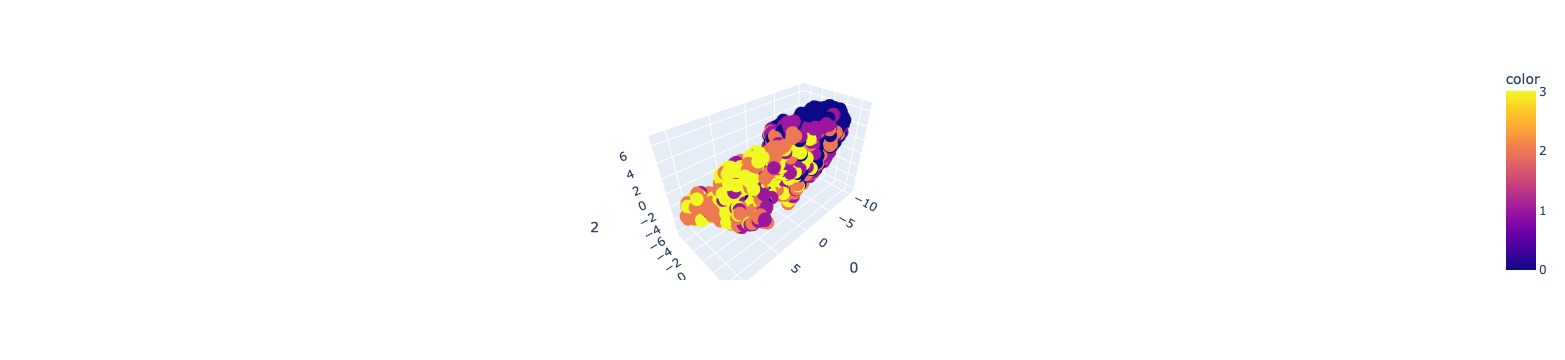

In [47]:
fig = px.scatter_3d(X_tsne, x=0, y=1, z=2, color=y_train)
fig.show()

In [48]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train_norm)

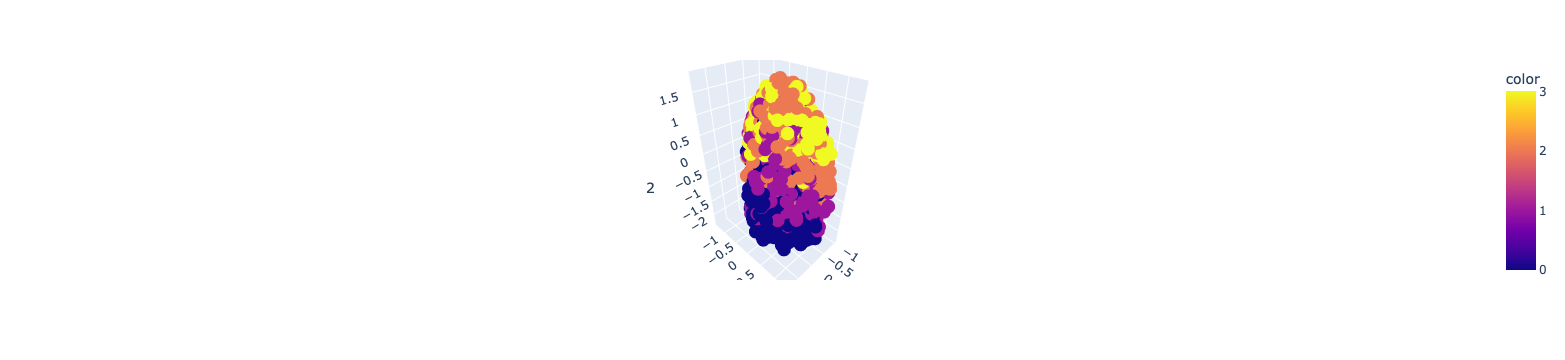

In [49]:
fig = px.scatter_3d(X_tsne, x=0, y=1, z=2, color=y_train)
fig.show()

In [50]:
fig.write_html("scatter_tsne_1000.html")

-------

In [51]:
X_train_norm = preprocessing.normalize(X_train)

X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns)
X_train_norm = X_train_norm.reset_index(drop=True)
X_train_norm

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,megapixels_câmera_principal,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi
0,0.619474,0.000000,0.000161,0.000322,0.002255,0.000000,0.014818,0.000161,0.061529,0.000322,0.003221,0.247081,0.566643,0.479665,0.003221,0.002899,0.000966,0.000322,0.000322,0.000322
1,0.262881,0.000478,0.000239,0.000000,0.007647,0.000478,0.010993,0.000048,0.069305,0.000956,0.008125,0.232291,0.922472,0.144345,0.008603,0.002390,0.003824,0.000478,0.000000,0.000000
2,0.535238,0.000000,0.001345,0.000000,0.001922,0.000480,0.004324,0.000192,0.094652,0.001441,0.007207,0.499684,0.514578,0.435782,0.004805,0.003363,0.008168,0.000480,0.000480,0.000000
3,0.328749,0.000450,0.000225,0.000450,0.000000,0.000450,0.012592,0.000225,0.058464,0.003598,0.000000,0.190684,0.464117,0.797813,0.005397,0.003598,0.004497,0.000450,0.000000,0.000000
4,0.676980,0.000000,0.000603,0.000000,0.000000,0.000431,0.008188,0.000043,0.043092,0.002586,0.000431,0.307248,0.602430,0.286995,0.005171,0.004309,0.005602,0.000431,0.000431,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,0.390129,0.000220,0.000507,0.000000,0.000000,0.000000,0.001984,0.000132,0.040335,0.001322,0.001102,0.242013,0.302626,0.834260,0.002865,0.002204,0.003086,0.000220,0.000000,0.000220
1336,0.853290,0.000496,0.000993,0.000000,0.000000,0.000000,0.005957,0.000149,0.060559,0.003971,0.003475,0.119133,0.448734,0.229331,0.002978,0.001489,0.002482,0.000000,0.000000,0.000000
1337,0.256902,0.000000,0.000256,0.000320,0.000000,0.000000,0.005759,0.000096,0.033912,0.001280,0.000320,0.200595,0.299132,0.896118,0.005759,0.004799,0.003839,0.000000,0.000320,0.000000
1338,0.786297,0.000000,0.000972,0.000000,0.002315,0.000463,0.008335,0.000417,0.074092,0.002778,0.009261,0.168095,0.460294,0.368606,0.006020,0.001389,0.006483,0.000463,0.000000,0.000463


In [52]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_train_norm)

In [53]:
fig = px.scatter_3d(X_tsne, x=0, y=1, z=2, color=y_train)
fig.show()

-----